In [1]:
# data access
import earthaccess

# custom tool functions
import importlib
import tools
import makeL3_scripts
importlib.reload(tools)
importlib.reload(makeL3_scripts)
from tools import *
from makeL3_scripts import makeL3

# data manipulation
import numpy as np
import xarray as xr
import cf_xarray  # noqa: F401
import rasterio
import rioxarray as rio
from rasterio.enums import Resampling

# plotting
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2025-07-01", "2025-08-01")
sep_bbox = (-110, 10, -70, 35) # SEP, WSEN
so_bbox = (-170,-60,-120,-50) # SO, WSEN

In [4]:
bbox = sep_bbox
results = earthaccess.search_data(
    short_name="PACE_HARP2_L2_CLOUD_GPC_NRT",
    temporal=tspan,
    bounding_box=bbox,
)
len(results)

184

In [5]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/184 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/184 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/184 [00:00<?, ?it/s]

In [6]:
ds = makeL3(paths, sep_bbox, resolution=1.0)
ds

<xarray.Dataset> Size: 3MB
Dimensions:                                           (time: 184, latitude: 26,
                                                       longitude: 41)
Coordinates:
  * time                                              (time) datetime64[ns] 1kB ...
  * latitude                                          (latitude) float64 208B ...
  * longitude                                         (longitude) float64 328B ...
Data variables:
    cloud_bow_droplet_effective_radius                (time, latitude, longitude) float32 785kB ...
    cloud_bow_droplet_effective_variance              (time, latitude, longitude) float32 785kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (time, latitude, longitude) float32 785kB ...
    cloud_bow_liquid_water_path                       (time, latitude, longitude) float32 785kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.12239729 -0.1...
    att_roll_start_end_degrees:                             [-0.3231854  -0.3...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-12.033219 -12.4...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95

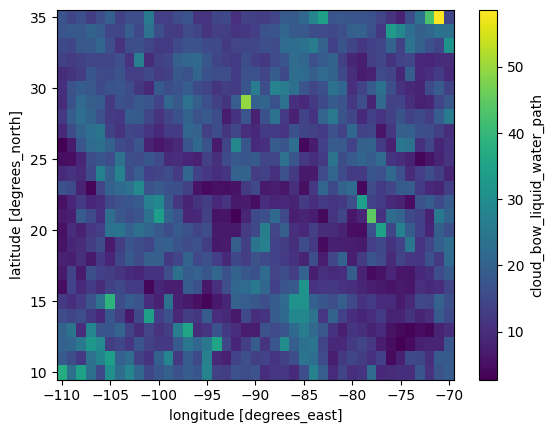

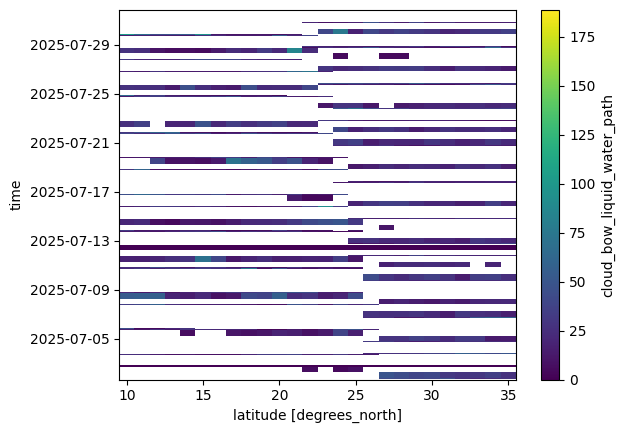

In [7]:
ds.cloud_bow_liquid_water_path.mean("time").plot()
plt.show()

ds.cloud_bow_liquid_water_path.mean("longitude").plot()
plt.show()

In [8]:
ds.to_netcdf("/home/jovyan/shared-public/pace-hackweek2025-mucloud-data/harpL3.SEP.1deg.nc")

In [7]:
dt = xr.open_datatree(paths[10])
ds = xr.merge(dt.to_dict().values())
ds = ds.set_coords(("longitude", "latitude"))
ds_src = ds[['cloud_bow_droplet_effective_radius',
             'cloud_bow_droplet_effective_variance',
             'cloud_bow_droplet_number_concentration_adiabatic',
             'cloud_bow_liquid_water_path']]
ds_src

<xarray.Dataset> Size: 5MB
Dimensions:                                           (bins_along_track: 396,
                                                       bins_across_track: 519)
Coordinates:
    latitude                                          (bins_along_track, bins_across_track) float32 822kB ...
    longitude                                         (bins_along_track, bins_across_track) float32 822kB ...
Dimensions without coordinates: bins_along_track, bins_across_track
Data variables:
    cloud_bow_droplet_effective_radius                (bins_along_track, bins_across_track) float32 822kB ...
    cloud_bow_droplet_effective_variance              (bins_along_track, bins_across_track) float32 822kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (bins_along_track, bins_across_track) float32 822kB ...
    cloud_bow_liquid_water_path                       (bins_along_track, bins_across_track) float32 822kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.13263653 -0.1...
    att_roll_start_end_degrees:                             [-0.32569888 -0.3...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-12.026931 -12.3...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95

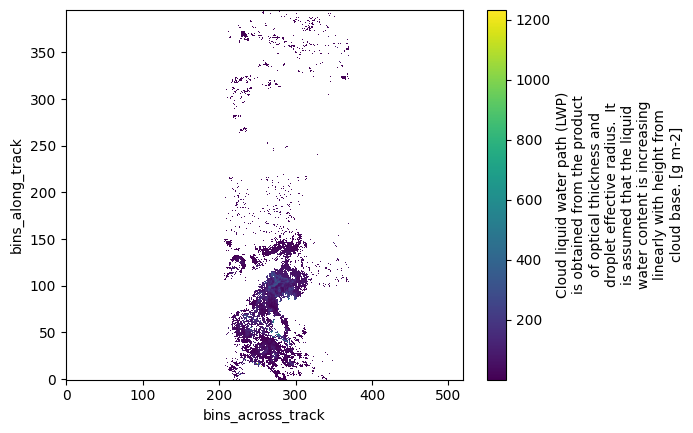

In [8]:
# ds_src.cloud_bow_droplet_number_concentration_adiabatic.plot()
ds_src.cloud_bow_liquid_water_path.plot()

In [9]:
ds_src = ds_src.rio.set_spatial_dims("bins_across_track", "bins_along_track")
ds_src = ds_src.rio.write_crs("epsg:4326")
ds_src

<xarray.Dataset> Size: 5MB
Dimensions:                                           (bins_along_track: 396,
                                                       bins_across_track: 519)
Coordinates:
    latitude                                          (bins_along_track, bins_across_track) float32 822kB ...
    longitude                                         (bins_along_track, bins_across_track) float32 822kB ...
    spatial_ref                                       int64 8B 0
Dimensions without coordinates: bins_along_track, bins_across_track
Data variables:
    cloud_bow_droplet_effective_radius                (bins_along_track, bins_across_track) float32 822kB ...
    cloud_bow_droplet_effective_variance              (bins_along_track, bins_across_track) float32 822kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (bins_along_track, bins_across_track) float32 822kB ...
    cloud_bow_liquid_water_path                       (bins_along_track, bins_across_track) float32 822kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.13263653 -0.1...
    att_roll_start_end_degrees:                             [-0.32569888 -0.3...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-12.026931 -12.3...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95

In [10]:
step = 0.5
W,S,E,N = bbox
lon = np.arange(W,E+step,step=step)
lat = np.arange(S,N+step,step=step)

ds_match = xr.Dataset(
                coords={
                    "longitude":lon,
                    "latitude":lat,
                },
)
ds_match.rio.write_crs("epsg:4326", inplace=True)
ds_match

<xarray.Dataset> Size: 1kB
Dimensions:      (longitude: 81, latitude: 51)
Coordinates:
  * longitude    (longitude) float64 648B -110.0 -109.5 -109.0 ... -70.5 -70.0
  * latitude     (latitude) float64 408B 10.0 10.5 11.0 11.5 ... 34.0 34.5 35.0
    spatial_ref  int64 8B 0
Data variables:
    *empty*

In [11]:
ds_dst = ds_src.rio.reproject_match(
    match_data_array=ds_match,
    src_geoloc_array=(
        ds_src.coords["longitude"],
        ds_src.coords["latitude"],
    ),
    nodata=np.nan,
    resampling=Resampling.average,
).rename({"x":"longitude", "y":"latitude"})
ds_dst = ds_dst.drop_vars(["spatial_ref"])
ds_dst = time_from_attr(ds_dst)
W,S,E,N = bbox
ds_dst = ds_dst.sel(latitude=slice(S,N),longitude=slice(W,E))
ds_dst

<xarray.Dataset> Size: 67kB
Dimensions:                                           (time: 1, latitude: 51,
                                                       longitude: 81)
Coordinates:
  * time                                              (time) datetime64[ns] 8B ...
  * latitude                                          (latitude) float64 408B ...
  * longitude                                         (longitude) float64 648B ...
Data variables:
    cloud_bow_droplet_effective_radius                (time, latitude, longitude) float32 17kB ...
    cloud_bow_droplet_effective_variance              (time, latitude, longitude) float32 17kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (time, latitude, longitude) float32 17kB ...
    cloud_bow_liquid_water_path                       (time, latitude, longitude) float32 17kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.13263653 -0.1...
    att_roll_start_end_degrees:                             [-0.32569888 -0.3...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-12.026931 -12.3...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95

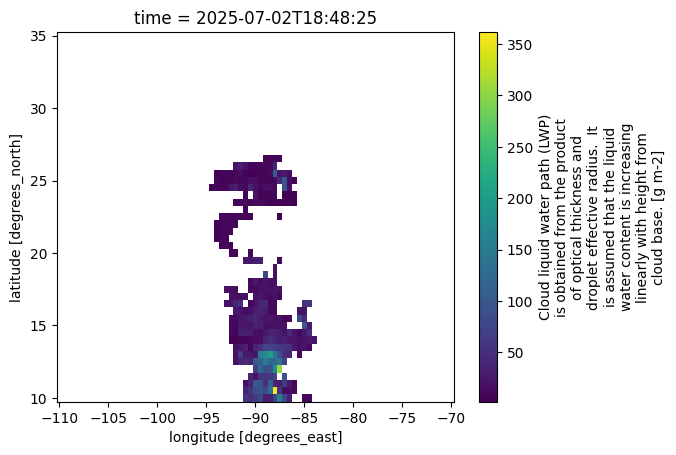

In [12]:
ds_dst.cloud_bow_liquid_water_path.plot()
plt.show()

In [16]:
l = []
l.append(ds_dst)
l.append(ds_dst)
dsm = xr.concat(l,dim="time")
dsm

<xarray.Dataset> Size: 133kB
Dimensions:                                           (time: 2, latitude: 51,
                                                       longitude: 81)
Coordinates:
  * time                                              (time) datetime64[ns] 16B ...
  * latitude                                          (latitude) float64 408B ...
  * longitude                                         (longitude) float64 648B ...
Data variables:
    cloud_bow_droplet_effective_radius                (time, latitude, longitude) float32 33kB ...
    cloud_bow_droplet_effective_variance              (time, latitude, longitude) float32 33kB ...
    cloud_bow_droplet_number_concentration_adiabatic  (time, latitude, longitude) float32 33kB ...
    cloud_bow_liquid_water_path                       (time, latitude, longitude) float32 33kB ...
Attributes: (12/110)
    Conventions:                                            CF-1.10
    acquisition_scheme:                                     4
    att_pitch_start_end_degrees:                            [-0.13263653 -0.1...
    att_roll_start_end_degrees:                             [-0.32569888 -0.3...
    att_time_offset:                                        0.0
    att_yaw_start_end_degrees:                              [-12.026931 -12.3...
    ...                                                     ...
    cloud_rft_lut_file_name:                                /sdps/sdpsoper/Sc...
    cloud_rft_scatt_angle_required_min:                     135.83791174582538
    cloud_rft_scatt_angle_required_max:                     150.0
    cloud_rft_scatt_angle_to_use_lo:                        135.83791174582538
    cloud_rft_scatt_angle_to_use_hi:                        165.0
    cloud_rft_decomposition_size_correlation_required_min:  0.95